# AIM
to simple test dowhy usage.

In [1]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx

/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- 1. 生成模拟数据 ---
模拟数据前5行：
         Age  ExerciseHours  DrugDosage  SodiumIntake  BloodPressure
0  59.967142       3.103962    9.646358   1546.096221      97.178407
1  53.617357       3.344347   10.072698   2069.807495     102.188819
2  61.476885       0.867913    9.562849   2293.197233     113.332933
3  70.230299       0.000000   11.407107   3443.843829     129.102526
4  52.658466       3.148565    6.478617   2778.276562     109.597625

数据描述：
               Age  ExerciseHours   DrugDosage  SodiumIntake  BloodPressure
count  1000.000000    1000.000000  1000.000000   1000.000000    1000.000000
mean     55.180964       2.063872    10.529765   2490.442816     108.178781
std       9.683780       1.782908     2.213307    512.964592       9.272437
min      30.000000       0.000000     3.825820   1035.275655      90.000000
25%      48.524097       0.329433     9.077914   2131.289773     102.021872
50%      55.253006       1.825113    10.481497   2500.092287     108.374004
75%      61.479439  

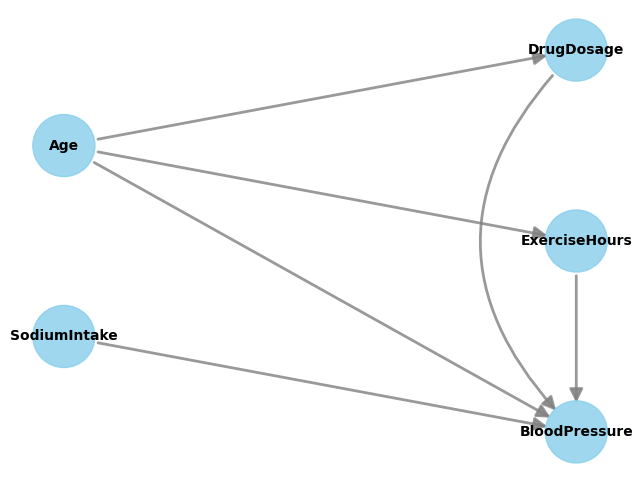


识别到的估计量 (Identified Estimand) for DrugDosage:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                            
─────────────(E[BloodPressure|Age])
d[DrugDosage]                      
Estimand assumption 1, Unconfoundedness: If U→{DrugDosage} and U→BloodPressure then P(BloodPressure|DrugDosage,Age,U) = P(BloodPressure|DrugDosage,Age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


估计结果 (Estimate) for DrugDosage:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                            
─────────────(E[BloodPressure|Age])
d[DrugDosage]                      
Estimand assumption 1, Unconfoundedness: If U→{DrugDosage} and U→BloodPressure then P(BloodPressure|DrugDosage,Age,U) = P(BloodPressure|DrugDosage,Age)


/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is dep


安慰剂处理反驳结果 (Placebo Treatment Refuter):
Refute: Use a Placebo Treatment
Estimated effect:-1.8316660949097496
New effect:0.0
p value:1.0



/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as position


随机共同原因反驳结果 (Random Common Cause Refuter):
Refute: Add a random common cause
Estimated effect:-1.8316660949097496
New effect:-1.831319561857491
p value:0.94



/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/home/choose/miniforge3/envs/dowhy_ultimate_env/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as position

In [3]:
class SimpleDowhyCase():
    def __init__(self, random_seed=42, show_falg: bool=False):
        np.random.seed(random_seed)
        self.show_falg = show_falg

    def generate_test_data(self) -> pd.DataFrame:
        # This method would generate test data for the case
        
        # --- 1. 生成模拟数据 ---
        print("--- 1. 生成模拟数据 ---")
        num_samples = 1000

        age = np.random.normal(55, 10, num_samples)
        age = np.clip(age, 30, 80)

        exercise_hours = 10 - 0.15 * age + np.random.normal(0, 1.5, num_samples)
        exercise_hours = np.clip(exercise_hours, 0, 15)

        drug_dosage = 5 + 0.1 * age + np.random.normal(0, 2, num_samples)
        drug_dosage = np.clip(drug_dosage, 0, 20)

        sodium_intake = np.random.normal(2500, 500, num_samples)
        sodium_intake = np.clip(sodium_intake, 1000, 4000)

        blood_pressure = (
            80
            + 0.5 * age
            - 2.0 * drug_dosage
            - 1.5 * exercise_hours
            + 0.01 * sodium_intake
            + np.random.normal(0, 5, num_samples)
        )
        blood_pressure = np.clip(blood_pressure, 90, 180)

        data = pd.DataFrame({
            'Age': age,
            'ExerciseHours': exercise_hours,
            'DrugDosage': drug_dosage,
            'SodiumIntake': sodium_intake,
            'BloodPressure': blood_pressure
        })

        print("模拟数据前5行：")
        print(data.head())
        print("\n数据描述：")
        print(data.describe())
        return data

    def define_Causal_Graph(self,) -> nx.DiGraph:
        # This method would define the causal graph for the case
        # 现在我们使用 networkx 构建图
        print("\n--- 2. 定义因果图 (使用 networkx.DiGraph) ---")
        causal_graph_nx = nx.DiGraph() # 创建一个有向图对象

        # 添加节点
        causal_graph_nx.add_nodes_from(['Age', 'DrugDosage', 'ExerciseHours', 'SodiumIntake', 'BloodPressure'])

        # 添加有向边
        causal_graph_nx.add_edge('Age', 'DrugDosage')
        causal_graph_nx.add_edge('Age', 'ExerciseHours')
        causal_graph_nx.add_edge('Age', 'BloodPressure')
        causal_graph_nx.add_edge('DrugDosage', 'BloodPressure')
        causal_graph_nx.add_edge('ExerciseHours', 'BloodPressure')
        causal_graph_nx.add_edge('SodiumIntake', 'BloodPressure')

        print("NetworkX 图的节点:", list(causal_graph_nx.nodes))
        print("NetworkX 图的边:", list(causal_graph_nx.edges))
        return causal_graph_nx

    #### 案例 A：分析 `DrugDosage` 对 `BloodPressure` 的因果效应
    def _caseA(self, data: pd.DataFrame, causal_graph_nx: nx.DiGraph, show_falg: bool=False):
        print("\n\n--- 案例 A: 分析 DrugDosage 对 BloodPressure 的因果效应 ---")

        # 3.1. 模型构建 (Model)
        model_drug = CausalModel(
            data=data,
            graph=causal_graph_nx,
            treatment='DrugDosage',
            outcome='BloodPressure'
        )

        # 打印模型概览，并尝试生成因果图的PDF（如果Graphviz已安装）
        print("\nDrugDosage 模型概览:")
        if show_falg:
            model_drug.view_model()


        # 3.2. 识别 (Identify)
        identified_estimand_drug = model_drug.identify_effect(proceed_when_unidentifiable=True)
        print("\n识别到的估计量 (Identified Estimand) for DrugDosage:")
        print(identified_estimand_drug)

        # 3.3. 估计 (Estimate)
        estimate_drug = model_drug.estimate_effect(
            identified_estimand_drug,
            method_name="backdoor.linear_regression"
        )
        print("\n估计结果 (Estimate) for DrugDosage:")
        print(estimate_drug)
        print(f"结论：药物剂量每增加1单位，血压平均改变: {estimate_drug.value:.2f} 单位")

        # 3.4. 反驳 (Refute) - 检验结果的稳健性
        print("\n反驳测试 (Refutation) for DrugDosage:")

        # **API 修正：使用 refute_estimate**
        refute_result_placebo_drug = model_drug.refute_estimate( # <--- 关键修改在这里
            identified_estimand_drug,
            estimate_drug,
            method_name="placebo_treatment_refuter"
        )
        print("\n安慰剂处理反驳结果 (Placebo Treatment Refuter):")
        print(refute_result_placebo_drug)

        # **API 修正：使用 refute_estimate**
        refute_result_random_common_cause_drug = model_drug.refute_estimate( # <--- 关键修改在这里
            identified_estimand_drug,
            estimate_drug,
            method_name="random_common_cause"
        )
        print("\n随机共同原因反驳结果 (Random Common Cause Refuter):")
        print(refute_result_random_common_cause_drug)

    #### 案例 B：分析 `ExerciseHours` 对 `BloodPressure` 的因果效应
    def _caseB(self, data: pd.DataFrame, causal_graph_nx: nx.DiGraph, show_falg: bool=False):
        print("\n\n--- 案例 B: 分析 ExerciseHours 对 BloodPressure 的因果效应 ---")

        # 3.1. 模型构建 (Model)
        model_exercise = CausalModel(
            data=data,
            graph=causal_graph_nx,
            treatment='ExerciseHours',
            outcome='BloodPressure'
        )
        if show_falg:
            model_exercise.view_model()


        # 3.2. 识别 (Identify)
        identified_estimand_exercise = model_exercise.identify_effect(proceed_when_unidentifiable=True)
        print("\n识别到的估计量 (Identified Estimand) for ExerciseHours:")
        print(identified_estimand_exercise)

        # 3.3. 估计 (Estimate)
        estimate_exercise = model_exercise.estimate_effect(
            identified_estimand_exercise,
            method_name="backdoor.linear_regression"
        )
        print("\n估计结果 (Estimate) for ExerciseHours:")
        print(estimate_exercise)
        print(f"结论：运动时长每增加1小时，血压平均改变: {estimate_exercise.value:.2f} 单位")

        # 3.4. 反驳 (Refute) - 检验结果的稳健性
        print("\n反驳测试 (Refutation) for ExerciseHours:")

        # **API 修正：使用 refute_estimate**
        refute_result_placebo_exercise = model_exercise.refute_estimate( # <--- 关键修改在这里
            identified_estimand_exercise,
            estimate_exercise,
            method_name="placebo_treatment_refuter"
        )
        print("\n安慰剂处理反驳结果 (Placebo Treatment Refuter):")
        print(refute_result_placebo_exercise)

        # **API 修正：使用 refute_estimate**
        refute_result_random_common_cause_exercise = model_exercise.refute_estimate( # <--- 关键修改在这里
            identified_estimand_exercise,
            estimate_exercise,
            method_name="random_common_cause"
        )
        print("\n随机共同原因反驳结果 (Random Common Cause Refuter):")
        print(refute_result_random_common_cause_exercise)

    #### 案例 C：分析 `SodiumIntake` 对 `BloodPressure` 的因果效应
    def _caseC(self,data: pd.DataFrame, causal_graph_nx: nx.DiGraph, show_falg: bool=False):
        print("\n\n--- 案例 C: 分析 SodiumIntake 对 BloodPressure 的因果效应 ---")

        # 3.1. 模型构建 (Model)
        model_sodium = CausalModel(
            data=data,
            graph=causal_graph_nx,
            treatment='SodiumIntake',
            outcome='BloodPressure'
        )
        if show_falg:
            model_sodium.view_model()

        # 3.2. 识别 (Identify)
        identified_estimand_sodium = model_sodium.identify_effect(proceed_when_unidentifiable=True)
        print("\n识别到的估计量 (Identified Estimand) for SodiumIntake:")
        print(identified_estimand_sodium)

        # 3.3. 估计 (Estimate)
        estimate_sodium = model_sodium.estimate_effect(
            identified_estimand_sodium,
            method_name="backdoor.linear_regression"
        )
        print("\n估计结果 (Estimate) for SodiumIntake:")
        print(estimate_sodium)
        print(f"结论：钠摄入量每增加1单位，血压平均改变: {estimate_sodium.value:.4f} 单位")

        # 3.4. 反驳 (Refute) - 检验结果的稳健性
        print("\n反驳测试 (Refutation) for SodiumIntake:")

        # **API 修正：使用 refute_estimate**
        refute_result_placebo_sodium = model_sodium.refute_estimate( # <--- 关键修改在这里
            identified_estimand_sodium,
            estimate_sodium,
            method_name="placebo_treatment_refuter"
        )
        print("\n安慰剂处理反驳结果 (Placebo Treatment Refuter):")
        print(refute_result_placebo_sodium)

        # **API 修正：使用 refute_estimate**
        refute_result_random_common_cause_sodium = model_sodium.refute_estimate( # <--- 关键修改在这里
            identified_estimand_sodium,
            estimate_sodium,
            method_name="random_common_cause"
        )
        print("\n随机共同原因反驳结果 (Random Common Cause Refuter):")
        print(refute_result_random_common_cause_sodium)

    def run_test(self):
        # This method would run the test case
        data = self.generate_test_data()
        causal_graph_nx = self.define_Causal_Graph()
        self._caseA(data, causal_graph_nx, self.show_falg)
        # self._caseB(data, causal_graph_nx, self.show_falg)
        # self._caseC(data, causal_graph_nx, self.show_falg)
        pass
    
    @classmethod
    def run(cls, random_seed: int=42, show_falg: bool=False):
        # This method would run the test case
        instance = cls(show_falg=show_falg, random_seed=random_seed)
        instance.run_test()

if __name__ == '__main__':
    SimpleDowhyCase.run(show_falg=True)  # 设置 show_falg=True 以显示图形和模型摘要


# end